<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/MOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Apprentissage automatique - Courbe AUC - ROC**

ASC - Courbe ROC
Dans la classification, il existe de nombreuses mesures d'évaluation différentes. Le plus populaire est la précision , qui mesure la fréquence à laquelle le modèle est correct. Il s'agit d'une excellente mesure car elle est facile à comprendre et il est souvent souhaitable d'obtenir les suppositions les plus correctes. Dans certains cas, vous pouvez envisager d'utiliser une autre métrique d'évaluation.

Une autre mesure courante est l' AUC , l'aire sous la courbe des caractéristiques de fonctionnement du récepteur ( ROC ). La courbe des caractéristiques de fonctionnement du récepteur représente le taux de vrais positifs ( TP ) par rapport au taux de faux positifs ( FP ) à différents seuils de classification. Les seuils sont des seuils de probabilité différents qui séparent les deux classes dans la classification binaire. Il utilise la probabilité pour nous dire dans quelle mesure un modèle sépare les classes.

Données déséquilibrées
Supposons que nous ayons un ensemble de données déséquilibré où la majorité de nos données est d'une valeur. Nous pouvons obtenir une grande précision pour le modèle en prédisant la classe majoritaire.

Exemple

Bien que nous obtenions une très grande précision, le modèle n'a fourni aucune information sur les données, il n'est donc pas utile. Nous prédisons avec précision la classe 1 100 % du temps, tandis que nous prédisons de manière inexacte la classe 0 0 % du temps. Au détriment de la précision, il serait peut-être préférable d'avoir un modèle qui peut quelque peu séparer les deux classes.

Exemple

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5

print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


Bien que nous obtenions une très grande précision, le modèle n'a fourni aucune information sur les données, il n'est donc pas utile. Nous prédisons avec précision la classe 1 100 % du temps, tandis que nous prédisons de manière inexacte la classe 0 0 % du temps. Au détriment de la précision, il serait peut-être préférable d'avoir un modèle qui peut quelque peu séparer les deux classes.

Exemple

In [ ]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() +
    np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7131
Confusion matrix
[[ 365  135]
 [2734 6766]]
class 0 accuracy: 0.73
class 1 accuracy: 0.7122105263157895


Pour le deuxième ensemble de prédictions, nous n'avons pas un score de précision aussi élevé que le premier, mais la précision pour chaque classe est plus équilibrée. En utilisant la précision comme mesure d'évaluation, nous évaluerions le premier modèle plus haut que le second, même s'il ne nous dit rien sur les données.

Dans de tels cas, il serait préférable d'utiliser une autre métrique d'évaluation telle que l'AUC.

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

Exemple
**Modèle 1 **

model 1 AUC score: 0.5


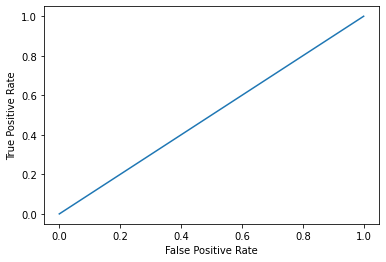

In [ ]:
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

score ASC du modèle 1 : 0,5

Exemple
**Modèle 2 **

model 2 AUC score: 0.8413440000000001


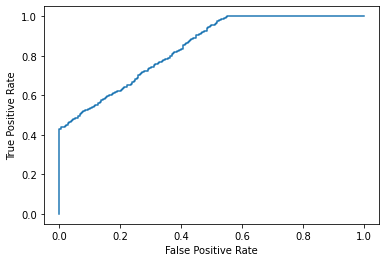

In [ ]:
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

Un score AUC d'environ 0,5 signifierait que le modèle est incapable de faire la distinction entre les deux classes et la courbe ressemblerait à une ligne avec une pente de 1. Un score AUC plus proche de 1 signifie que le modèle a la capacité de séparer les deux classes et la courbe se rapprocherait du coin supérieur gauche du graphique.

Probabilités
Étant donné que l'AUC est une métrique qui utilise les probabilités des prédictions de classe, nous pouvons être plus confiants dans un modèle qui a un score AUC plus élevé qu'un modèle avec un score inférieur, même s'ils ont des précisions similaires.

Dans les données ci-dessous, nous avons deux ensembles de probabilités issus de modèles hypothétiques. Le premier a des probabilités qui ne sont pas aussi "confiantes" lors de la prédiction des deux classes (les probabilités sont proches de 0,5). La seconde a des probabilités plus « sûres » lors de la prédiction des deux classes (les probabilités sont proches des extrêmes de 0 ou 1).

Exemple

In [ ]:
import numpy as np

n = 10000
y = np.array([0] * n + [1] * n)
#
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

model 1 accuracy score: 0.7496
model 2 accuracy score: 0.7485
model 1 AUC score: 0.77454959
model 2 AUC score: 0.86036639


Exemple
**Modèle de parcelle 1 :**

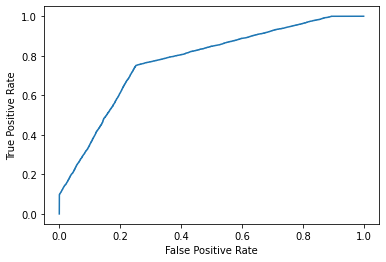

In [8]:
plot_roc_curve(y, y_prob_1)

Exemple
**Modèle de tracé 2 :**

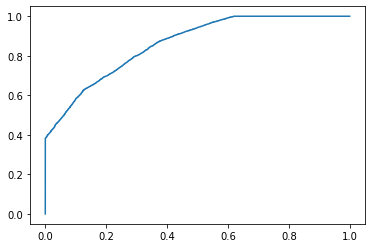

In [9]:
fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)

Même si les précisions des deux modèles sont similaires, le modèle avec le score AUC le plus élevé sera plus fiable car il prend en compte la probabilité prédite. Il est plus susceptible de vous donner une plus grande précision lors de la prévision des données futures.